In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (18, 8)

df = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')

categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)
df.head()

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status',
       'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe',
       'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe',
       'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'cardiac', 'pulm_moderate'],
      dtype='object')


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [3]:
# For Test DF
test_df = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')
test_df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


In [4]:
df = df.drop(columns=["ID"])

df.head()

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [5]:
def check_for_na_cols(df: pd.DataFrame):
    na_cols = df.columns[df.isna().any()].tolist()
    categorical = [col for col in na_cols if df[col].dtype == 'object']
    numerical = [col for col in na_cols if df[col].dtype != 'object']
    print("Categorical Data: ", categorical)
    print("Numerical Data: ", numerical)

check_for_na_cols(df)

Categorical Data:  ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'arrhythmia', 'vent_hist', 'renal_issue', 'pulm_severe', 'cmv_status', 'tce_imm_match', 'rituximab', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']
Numerical Data:  ['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'hla_match_a_high', 'donor_age', 'hla_match_b_low', 'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score', 'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high', 'hla_low_res_10']


                          efs  age_at_hct  comorbidity_score  \
efs                  1.000000    0.227866           0.145723   
age_at_hct           0.227866    1.000000           0.238244   
comorbidity_score    0.145723    0.238244           1.000000   
hla_match_drb1_high  0.074446    0.048500          -0.012420   
hla_match_drb1_low   0.067485    0.060414          -0.018370   
hla_high_res_10      0.048431    0.018006          -0.018356   
donor_age            0.047566    0.145505           0.085834   
hla_low_res_6        0.047007    0.025693          -0.008468   
hla_high_res_6       0.045261    0.022085          -0.006176   
hla_high_res_8       0.044224    0.011972          -0.014173   
hla_low_res_10       0.041972    0.014385          -0.013490   
hla_match_b_low      0.040965   -0.015624          -0.019332   
hla_low_res_8        0.040612    0.012455          -0.013084   
hla_nmdp_6           0.040145    0.021023           0.002780   
hla_match_dqb1_high  0.039736    0.02352

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


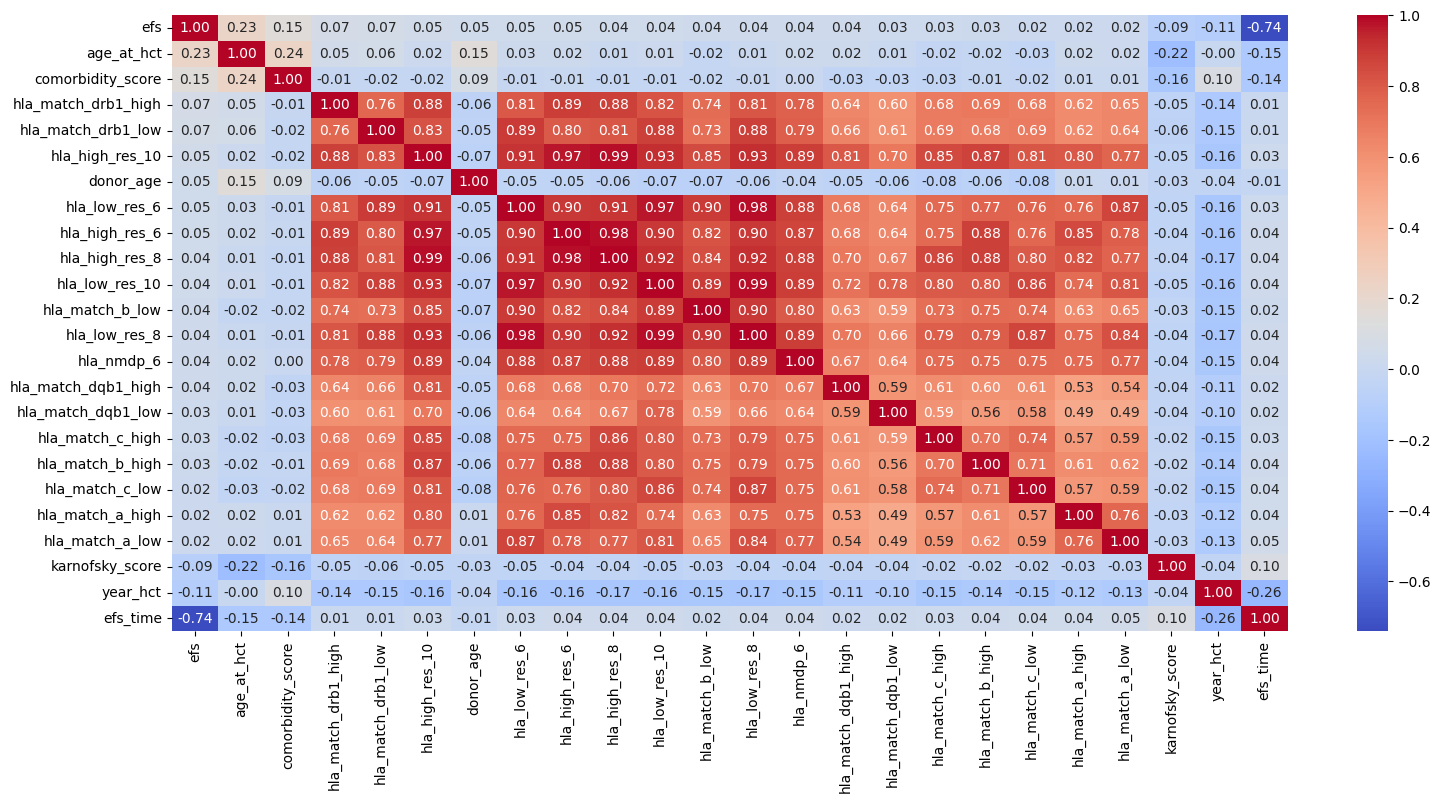

In [6]:
def get_heatmap(df: pd.DataFrame, columns=None):
    df_dropped = df.select_dtypes(exclude=["object", 'category'])
    
    if columns is not None:
        df_dropped = df_dropped[columns]
    
    corr_matrix = df_dropped.corr()
    sorted_corr = corr_matrix['efs'].sort_values(ascending=False)
    sorted_corr = corr_matrix.loc[sorted_corr.index, sorted_corr.index]
    
    sns.heatmap(sorted_corr, annot=True, fmt='.2f', cmap='coolwarm')
    print(sorted_corr)

get_heatmap(df)

df.head()

### Feature Engineering

In [7]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_data(train_df: pd.DataFrame, test_df: pd.DataFrame):
    categorical_columns = train_df.select_dtypes(include=['object']).columns
    encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
    
    encoder.fit(train_df[categorical_columns])
    
    train_encoded_data = encoder.transform(train_df[categorical_columns])
    test_encoded_data = encoder.transform(test_df[categorical_columns])
    
    train_encoded_df = pd.DataFrame(
        train_encoded_data.toarray(), 
        columns=encoder.get_feature_names_out(categorical_columns),
        index=train_df.index
    )
    
    test_encoded_df = pd.DataFrame(
        test_encoded_data.toarray(), 
        columns=encoder.get_feature_names_out(categorical_columns),
        index=test_df.index
    )
    
    train_df_encoded = pd.concat(
        [train_df.drop(columns=categorical_columns), train_encoded_df], axis=1)
    
    test_df_encoded = pd.concat(
        [test_df.drop(columns=categorical_columns), test_encoded_df], axis=1)
    
    return train_df_encoded, test_df_encoded

def cast_datatypes(df: pd.DataFrame):
    df_dropped = df.select_dtypes(exclude=["object", 'category'])
    num_cols = df_dropped.columns
    for col in df.columns:
        if col in num_cols:
            df[col] = df[col].fillna(-1.0).astype('float32')
        else:
            df[col] = df[col].fillna('Unknown').astype('str')
    return df


df, test_df = encode_categorical_data(df, test_df)
df, test_df = cast_datatypes(df), cast_datatypes(test_df)

print(df.shape, test_df.shape)

(28800, 215) (3, 214)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def add_features(df):
    df['age_karnofsky'] = df['age_at_hct'] * df['karnofsky_score']
    df['age_comorbidity'] = df['age_at_hct'] * df['comorbidity_score']
    df['donor_recipient_age_diff'] = abs(
        df['donor_age'] - df['age_at_hct'])

    df['years_since_2000'] = df['year_hct'] - 2000

    df['hla_match_ratio'] = (
        df['hla_high_res_8'] + df['hla_low_res_8']) / 16

    df['age_squared'] = df['age_at_hct'] ** 2
    df['karnofsky_squared'] = df['karnofsky_score'] ** 2

    return df


def normalize_features(df):
    num_cols = df.select_dtypes(
        include=['float32', 'float64', 'int32', 'int64']).columns
    num_cols = [col for col in num_cols if col not in [
        'ID', 'efs', 'efs_time']]
    
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df


df, test_df = add_features(df), add_features(test_df)
df, test_df = normalize_features(df), normalize_features(test_df)

print(df.shape, test_df.shape)

<ipython-input-8-62af127c9f55>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['age_karnofsky'] = df['age_at_hct'] * df['karnofsky_score']
<ipython-input-8-62af127c9f55>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['age_comorbidity'] = df['age_at_hct'] * df['comorbidity_score']
<ipython-input-8-62af127c9f55>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

(28800, 222) (3, 221)


In [9]:
# numerical_columns = df.select_dtypes(
#     include=['float32', 'float64', 'int32', 'int64']).columns

# for col in numerical_columns:
#     plt.figure()
#     sns.displot(df[col].dropna(), kde=True, bins=30)
#     plt.title(f'Distribution of {col}')
#     plt.show()

### Model Training

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['efs', 'efs_time'])
y = df['efs']

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42, shuffle=True)

In [11]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# log_reg = LogisticRegression()
# log_reg.fit(train_X, train_y)

# train_preds = log_reg.predict(train_X)
# test_preds = log_reg.predict(test_X)

# metrics = {
#     'Accuracy': accuracy_score,
#     'Precision': precision_score,
#     'Recall': recall_score,
#     'F1 Score': f1_score,
#     'ROC AUC': roc_auc_score
# }

# print("Training Performance:")
# for metric_name, metric_func in metrics.items():
#     print(f"{metric_name}: {metric_func(train_y, train_preds):.4f}")

# print("\nTesting Performance:")
# for metric_name, metric_func in metrics.items():
#     print(f"{metric_name}: {metric_func(test_y, test_preds):.4f}")

# metric_names = list(metrics.keys())
# train_scores = [metric_func(train_y, train_preds) for metric_func in metrics.values()]
# test_scores = [metric_func(test_y, test_preds) for metric_func in metrics.values()]

# x = np.arange(len(metric_names))
# width = 0.35

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
# rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# ax.set_xlabel('Metrics')
# ax.set_ylabel('Scores')
# ax.set_title('Model Performance Metrics')
# ax.set_xticks(x)
# ax.set_xticklabels(metric_names)
# ax.legend()

# fig.tight_layout()
# plt.show()

In [12]:
# from sklearn.tree import DecisionTreeClassifier

# dt_classifier = DecisionTreeClassifier()
# dt_classifier.fit(train_X, train_y)

# train_preds = dt_classifier.predict(train_X)
# test_preds = dt_classifier.predict(test_X)

# metrics = {
#     'Accuracy': accuracy_score,
#     'Precision': precision_score,
#     'Recall': recall_score,
#     'F1 Score': f1_score,
#     'ROC AUC': roc_auc_score
# }

# print("Training Performance:")
# for metric_name, metric_func in metrics.items():
#     print(f"{metric_name}: {metric_func(train_y, train_preds):.4f}")

# print("\nTesting Performance:")
# for metric_name, metric_func in metrics.items():
#     print(f"{metric_name}: {metric_func(test_y, test_preds):.4f}")

# metric_names = list(metrics.keys())
# train_scores = [metric_func(train_y, train_preds)
#                 for metric_func in metrics.values()]
# test_scores = [metric_func(test_y, test_preds)
#                for metric_func in metrics.values()]

# x = np.arange(len(metric_names))
# width = 0.35

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
# rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# ax.set_xlabel('Metrics')
# ax.set_ylabel('Scores')
# ax.set_title('Model Performance Metrics')
# ax.set_xticks(x)
# ax.set_xticklabels(metric_names)
# ax.legend()

# fig.tight_layout()
# plt.show()

In [13]:
# from sklearn.ensemble import RandomForestClassifier

# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(train_X, train_y)

# train_preds = rf_classifier.predict(train_X)
# test_preds = rf_classifier.predict(test_X)

# metrics = {
#     'Accuracy': accuracy_score,
#     'Precision': precision_score,
#     'Recall': recall_score,
#     'F1 Score': f1_score,
#     'ROC AUC': roc_auc_score
# }

# print("Training Performance:")
# for metric_name, metric_func in metrics.items():
#     print(f"{metric_name}: {metric_func(train_y, train_preds):.4f}")

# print("\nTesting Performance:")
# for metric_name, metric_func in metrics.items():
#     print(f"{metric_name}: {metric_func(test_y, test_preds):.4f}")

# metric_names = list(metrics.keys())
# train_scores = [metric_func(train_y, train_preds)
#                 for metric_func in metrics.values()]
# test_scores = [metric_func(test_y, test_preds)
#                for metric_func in metrics.values()]

# x = np.arange(len(metric_names))
# width = 0.35

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
# rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# ax.set_xlabel('Metrics')
# ax.set_ylabel('Scores')
# ax.set_title('Model Performance Metrics')
# ax.set_xticks(x)
# ax.set_xticklabels(metric_names)
# ax.legend()

# fig.tight_layout()
# plt.show()

Training Performance:
Accuracy: 0.8611
Precision: 0.8499
Recall: 0.9023
F1 Score: 0.8753
ROC AUC: 0.9390

Testing Performance:
Accuracy: 0.6726
Precision: 0.6777
Recall: 0.7428
F1 Score: 0.7088
ROC AUC: 0.7331


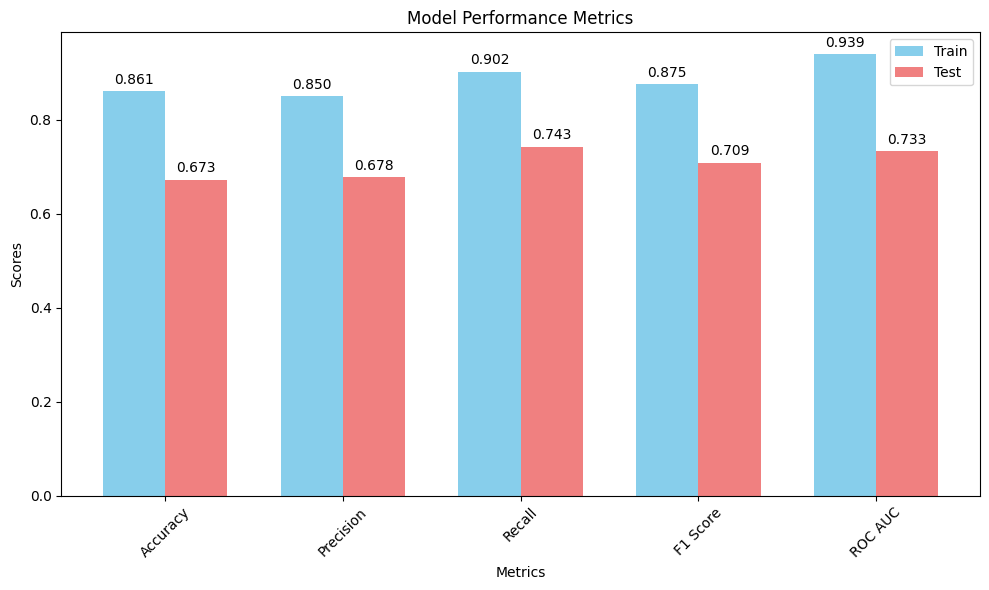

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

if isinstance(train_X, pd.DataFrame):
    train_X = train_X.to_numpy()
if isinstance(test_X, pd.DataFrame):
    test_X = test_X.to_numpy()
if isinstance(train_y, pd.Series):
    train_y = train_y.to_numpy()
if isinstance(test_y, pd.Series):
    test_y = test_y.to_numpy()

xgb_classifier = XGBClassifier()
xgb_classifier.fit(train_X, train_y)

train_preds = xgb_classifier.predict(train_X)
test_preds = xgb_classifier.predict(test_X)

train_probs = xgb_classifier.predict_proba(train_X)[:, 1]
test_probs = xgb_classifier.predict_proba(test_X)[:, 1]

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

print("Training Performance:")
train_scores = []
for metric_name, metric_func in metrics.items():
    if metric_name == 'ROC AUC':
        score = metric_func(train_y, train_probs)
    else:
        score = metric_func(train_y, train_preds)
    train_scores.append(score)
    print(f"{metric_name}: {score:.4f}")

print("\nTesting Performance:")
test_scores = []
for metric_name, metric_func in metrics.items():
    if metric_name == 'ROC AUC':
        score = metric_func(test_y, test_probs)
    else:
        score = metric_func(test_y, test_preds)
    test_scores.append(score)
    print(f"{metric_name}: {score:.4f}")

metric_names = list(metrics.keys())
x = np.arange(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width,
                label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width,
                label='Test', color='lightcoral')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metric_names, rotation=45)
ax.legend()

fig.tight_layout()
plt.show()

In [15]:
# import logging
# import warnings
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# warnings.filterwarnings('ignore')
# logging.getLogger('xgboost').setLevel(logging.ERROR)

# if isinstance(train_X, pd.DataFrame):
#     train_X = train_X.to_numpy()
# if isinstance(test_X, pd.DataFrame):
#     test_X = test_X.to_numpy()
# if isinstance(train_y, pd.Series):
#     train_y = train_y.to_numpy()
# if isinstance(test_y, pd.Series):
#     test_y = test_y.to_numpy()

# param_grid = {
#     'n_estimators': randint(100, 500),  
#     'max_depth': randint(3, 8),         
#     'learning_rate': uniform(0.05, 0.2),  
#     'subsample': uniform(0.7, 0.3),      
#     'colsample_bytree': uniform(0.7, 0.3),
#     'min_child_weight': randint(1, 5),
#     'gamma': uniform(0, 0.3),

#     'tree_method': ['hist']
# }

# xgb = XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     verbosity=0,  
#     tree_method='hist',  
#     predictor='cpu_predictor'  
# )

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=20,  
#     scoring='roc_auc',
#     cv=3,       
#     random_state=42,
#     n_jobs=-1,  
#     verbose=0   
# )

# random_search.fit(train_X, train_y)

# print("\nBest parameters:", random_search.best_params_)
# print("Best ROC AUC score: {:.4f}".format(random_search.best_score_))

# best_model = random_search.best_estimator_

# train_probs = best_model.predict_proba(train_X)
# test_probs = best_model.predict_proba(test_X)
# train_preds = (train_probs[:, 1] > 0.5).astype(int)  
# test_preds = (test_probs[:, 1] > 0.5).astype(int)

# metrics = {
#     'Accuracy': accuracy_score,
#     'Precision': precision_score,
#     'Recall': recall_score,
#     'F1 Score': f1_score,
#     'ROC AUC': roc_auc_score
# }

# train_scores = []
# test_scores = []
# print("\nTraining Performance:")
# for metric_name, metric_func in metrics.items():
#     if metric_name == 'ROC AUC':
#         train_score = metric_func(train_y, train_probs[:, 1])
#         test_score = metric_func(test_y, test_probs[:, 1])
#     else:
#         train_score = metric_func(train_y, train_preds)
#         test_score = metric_func(test_y, test_preds)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"{metric_name}: {train_score:.4f}")

# print("\nTesting Performance:")
# for metric_name, score in zip(metrics.keys(), test_scores):
#     print(f"{metric_name}: {score:.4f}")

# fig, ax = plt.subplots(figsize=(10, 6))
# x = np.arange(len(metrics))
# width = 0.35

# rects1 = ax.bar(x - width/2, train_scores, width,
#                 label='Train', color='skyblue')
# rects2 = ax.bar(x + width/2, test_scores, width,
#                 label='Test', color='lightcoral')

# for rects in [rects1, rects2]:
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height:.3f}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# ax.set_xlabel('Metrics')
# ax.set_ylabel('Scores')
# ax.set_title('Tuned XGBoost Performance Metrics')
# ax.set_xticks(x)
# ax.set_xticklabels(list(metrics.keys()), rotation=45)
# ax.legend()

# fig.tight_layout()
# plt.show()

In [16]:
def find_missing_columns(df1, df2):
    missing_cols = set(df1.columns) - set(df2.columns)
    print("Columns in df1 that are not in df2:")
    for col in sorted(missing_cols):
        print(f"- {col}")
    return list(missing_cols)

missing_cols = find_missing_columns(df, test_df)

Columns in df1 that are not in df2:
- efs
- efs_time


In [17]:
print(train_X.shape, test_df.shape)

(21600, 220) (3, 221)


In [18]:
xgb_model = XGBClassifier(
    colsample_bytree=0.9266653415629146,
    gamma=0.06863944964748674,
    learning_rate=0.0653959819657586,
    max_depth=5,
    min_child_weight=3,
    n_estimators=185,
    subsample=0.9641403517045772,
    tree_method='hist',
    eval_metric='logloss',
    use_label_encoder=False,
    verbosity=0
)

xgb_model.fit(train_X, train_y)

temp_df = test_df.drop(columns=["ID"])

predictions = xgb_model.predict_proba(temp_df)[:, 1]
predictions_df = pd.DataFrame({'ID': test_df['ID'], 'prediction': predictions})
print(predictions_df)

        ID  prediction
0  28800.0    0.465938
1  28801.0    0.653229
2  28802.0    0.407043


In [19]:
predictions_df = pd.DataFrame({'ID': test_df['ID'].astype(int), 'prediction': predictions})
predictions_df.to_csv('submission.csv', index=False)